In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
rho = np.sqrt(3/5)

In [3]:
Rg_anhydrous = {
    'HEWL': np.array([1.41,1.38,1.39,1.39,1.37,1.39]),
    'RNaseA': np.array([1.42,1.43,1.43,1.43,1.44,1.43]),
    'Myoglobin': np.array([1.52,1.53,1.52,1.51,1.52,1.52]),
    'S100A13': np.array([1.72,1.77,1.76]),
    'ACBP': np.array([1.32,1.40,1.33,1.28,1.34]),
    'Prolactin': np.array([1.82,1.76,1.85]),
    '14-3-3': np.array([2.74,2.72,2.75])
}

Rh = {
    'HEWL': np.array([1.84,1.84,1.85,1.83,1.83,1.84]),
    'RNaseA': np.array([1.90,1.90,1.90,1.90,1.84,1.91]),
    'Myoglobin': np.array([2.00,2.00,1.99,1.98,1.98,2.00]),
    'S100A13': np.array([2.36,2.44,2.40]),
    'ACBP': np.array([1.66,1.68,1.67,1.64,1.69]),
    'Prolactin': np.array([2.35,2.27,2.40]),
    '14-3-3': np.array([3.51,3.50,3.50])
}

Asph = {
    'HEWL': np.array([0.11,0.11,0.12,0.12,0.11,0.12]),
    'RNaseA': np.array([0.15,0.15,0.14,0.14,0.13,0.14]),
    'Myoglobin': np.array([0.09,0.08,0.09,0.08,0.08,0.08]),
    'S100A13': np.array([0.03,0.09,0.10]),
    'ACBP': np.array([0.15,0.16,0.15,0.13,0.16]),
    'Prolactin': np.array([0.20,0.23,0.21]),
    '14-3-3': np.array([0.16,0.14,0.15])
}

Rg_waxsis = {
    'HEWL': np.array([1.53,1.45,1.46,1.46,1.48,1.46]),
    'RNaseA': np.array([1.48,1.48,1.48,1.49,1.48,1.48]),
    'Myoglobin': np.array([1.64,1.66,1.62,1.62,1.63,1.68]),
    'S100A13': np.array([1.90,1.88,1.86]),
    'ACBP': np.array([1.39,1.44,1.42,1.40,1.41]),
    'Prolactin': np.array([1.96,1.85,1.94]),
    '14-3-3': np.array([2.85,2.83,2.89])
}

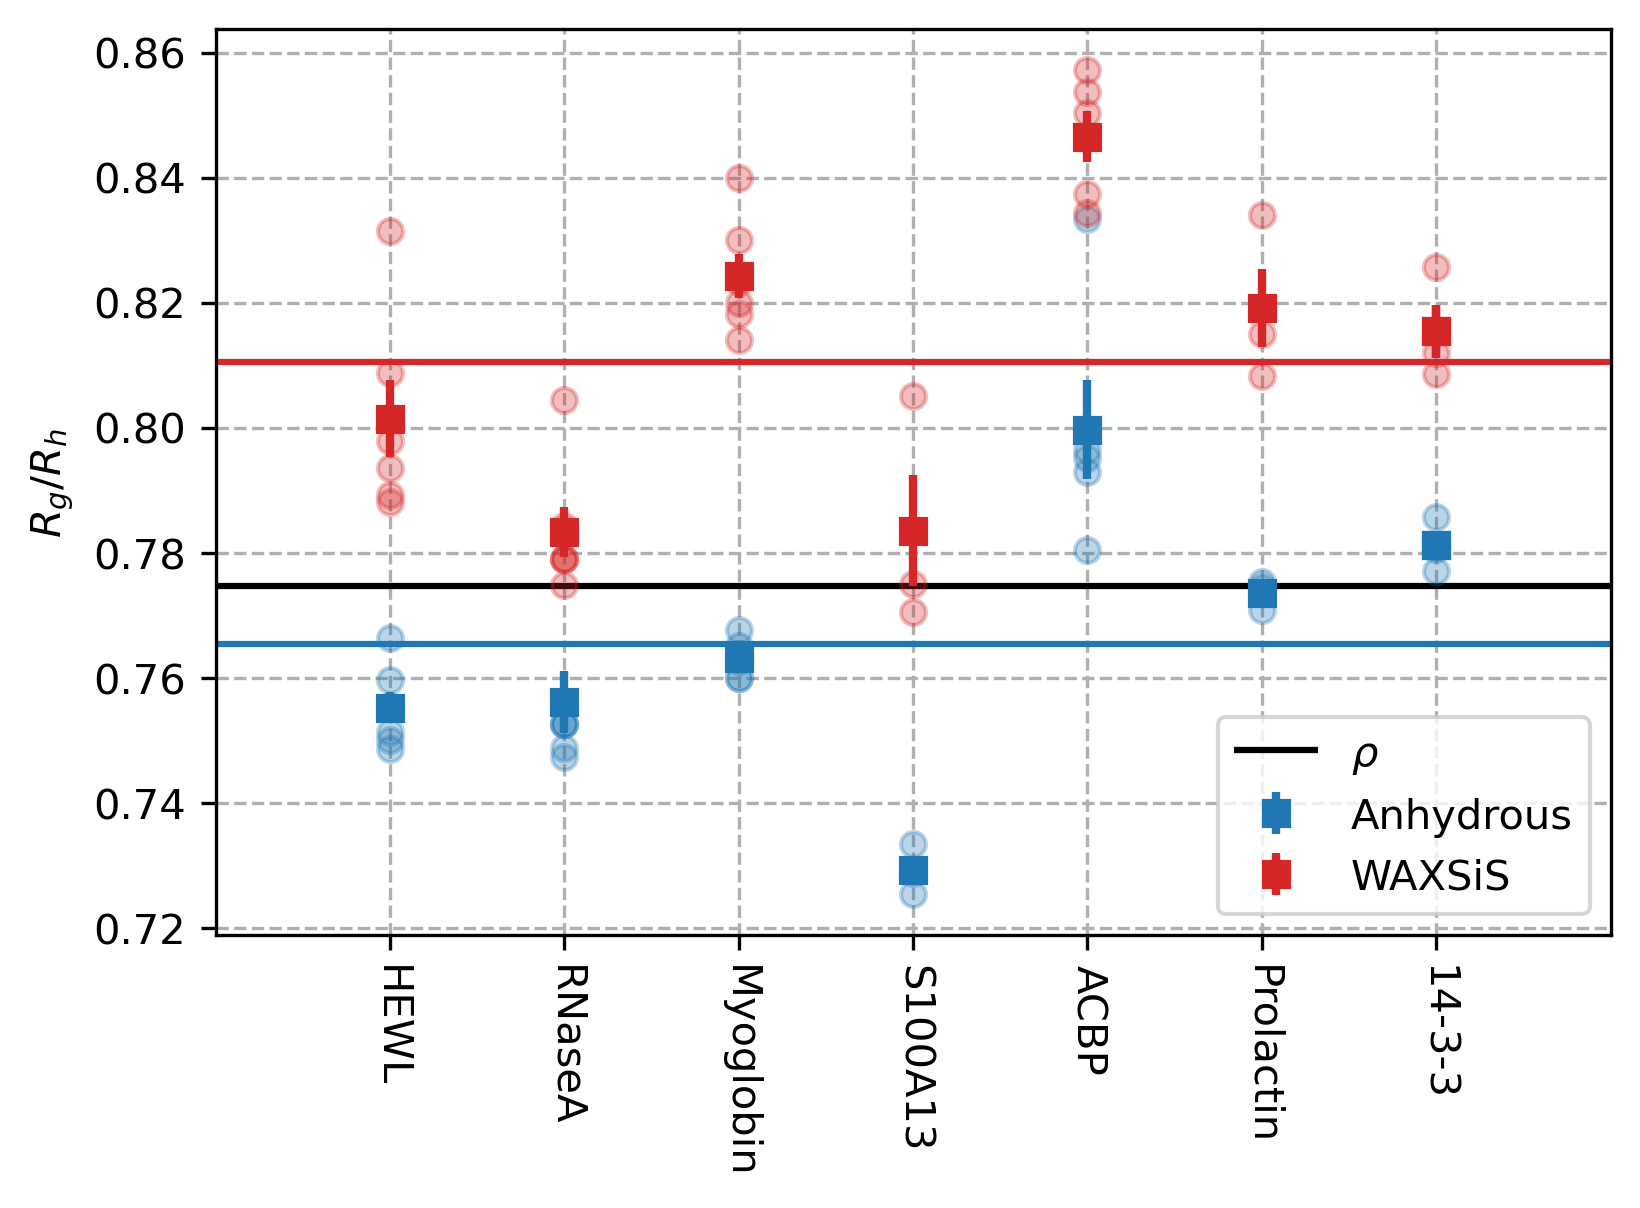

In [5]:
plt.figure(dpi=300, facecolor='w')
plt.grid(linestyle='dashed')
for p in Rh.keys():
    plt.scatter([p]*len(Rh[p]), Rg_anhydrous[p]/Rh[p],color='tab:blue',zorder=300000, alpha=0.3)
    plt.errorbar([p], np.average(Rg_anhydrous[p]/Rh[p]), np.array(Rg_anhydrous[p]/Rh[p]).std()/np.sqrt(len(Rh[p])), fmt='s',zorder=1000000, elinewidth=2, color='tab:blue')
    plt.scatter([p]*len(Rh[p]), Rg_waxsis[p]/Rh[p],color='tab:red',zorder=300000, alpha=0.3)
    plt.errorbar([p], np.average(Rg_waxsis[p]/Rh[p]), np.array(Rg_waxsis[p]/Rh[p]).std()/np.sqrt(len(Rh[p])), fmt='s',zorder=1000000, elinewidth=2, color='tab:red')
plt.errorbar([p], np.average(Rg_anhydrous[p]/Rh[p]), np.array(Rg_anhydrous[p]/Rh[p]).std()/np.sqrt(len(Rh[p])), fmt='s',zorder=1000000, elinewidth=2, color='tab:blue', label='Anhydrous')
plt.errorbar([p], np.average(Rg_waxsis[p]/Rh[p]), np.array(Rg_waxsis[p]/Rh[p]).std()/np.sqrt(len(Rh[p])), fmt='s',zorder=1000000, elinewidth=2, color='tab:red', label='WAXSiS')
plt.hlines(rho,-1,9, color='k',label=r'$\rho$')
plt.hlines(np.average([(Rg_anhydrous[p]/Rh[p]).mean() for p in Rh.keys()]),-1,9,color='tab:blue')
plt.hlines(np.average([(Rg_waxsis[p]/Rh[p]).mean() for p in Rh.keys()]),-1,9,color='tab:red')
plt.xlim(-1,7)
plt.ylabel(r'$R_g/R_h$')
plt.xticks(rotation = 270)
plt.legend()

#plt.savefig('FIGS/ratio.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait', bbox_inches='tight')

In [6]:
import mdtraj as md

In [7]:
def dstar(traj):
    ls = md.principal_moments(traj)
    l1, l2, l3 = ls[...,0], ls[...,1], ls[...,2]
    res = ((l1*l2+l2*l3+l3*l1)/(l1+l2+l3)**2).mean()
    res = 1-3*res
    return res

In [64]:
pdbs = ['HEWL/1E8L.pdb', 'RNaseA/2AAS.pdb', 'Myoglobin/5ZZE.pdb', 'S100A13/1YUU.pdb', 'ACBP/1NTI.pdb', 'Prolactin/1RW5.pdb', '14-3-3/2O02.pdb']

In [68]:
asph = [dstar(md.load(pdb)) for pdb in pdbs]
dev = np.abs( [Rg_anhydrous[p][0]/Rh[p][0]-rho for p in Rh.keys()])

/Users/hgk622/Software/miniconda3/lib/python3.9/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


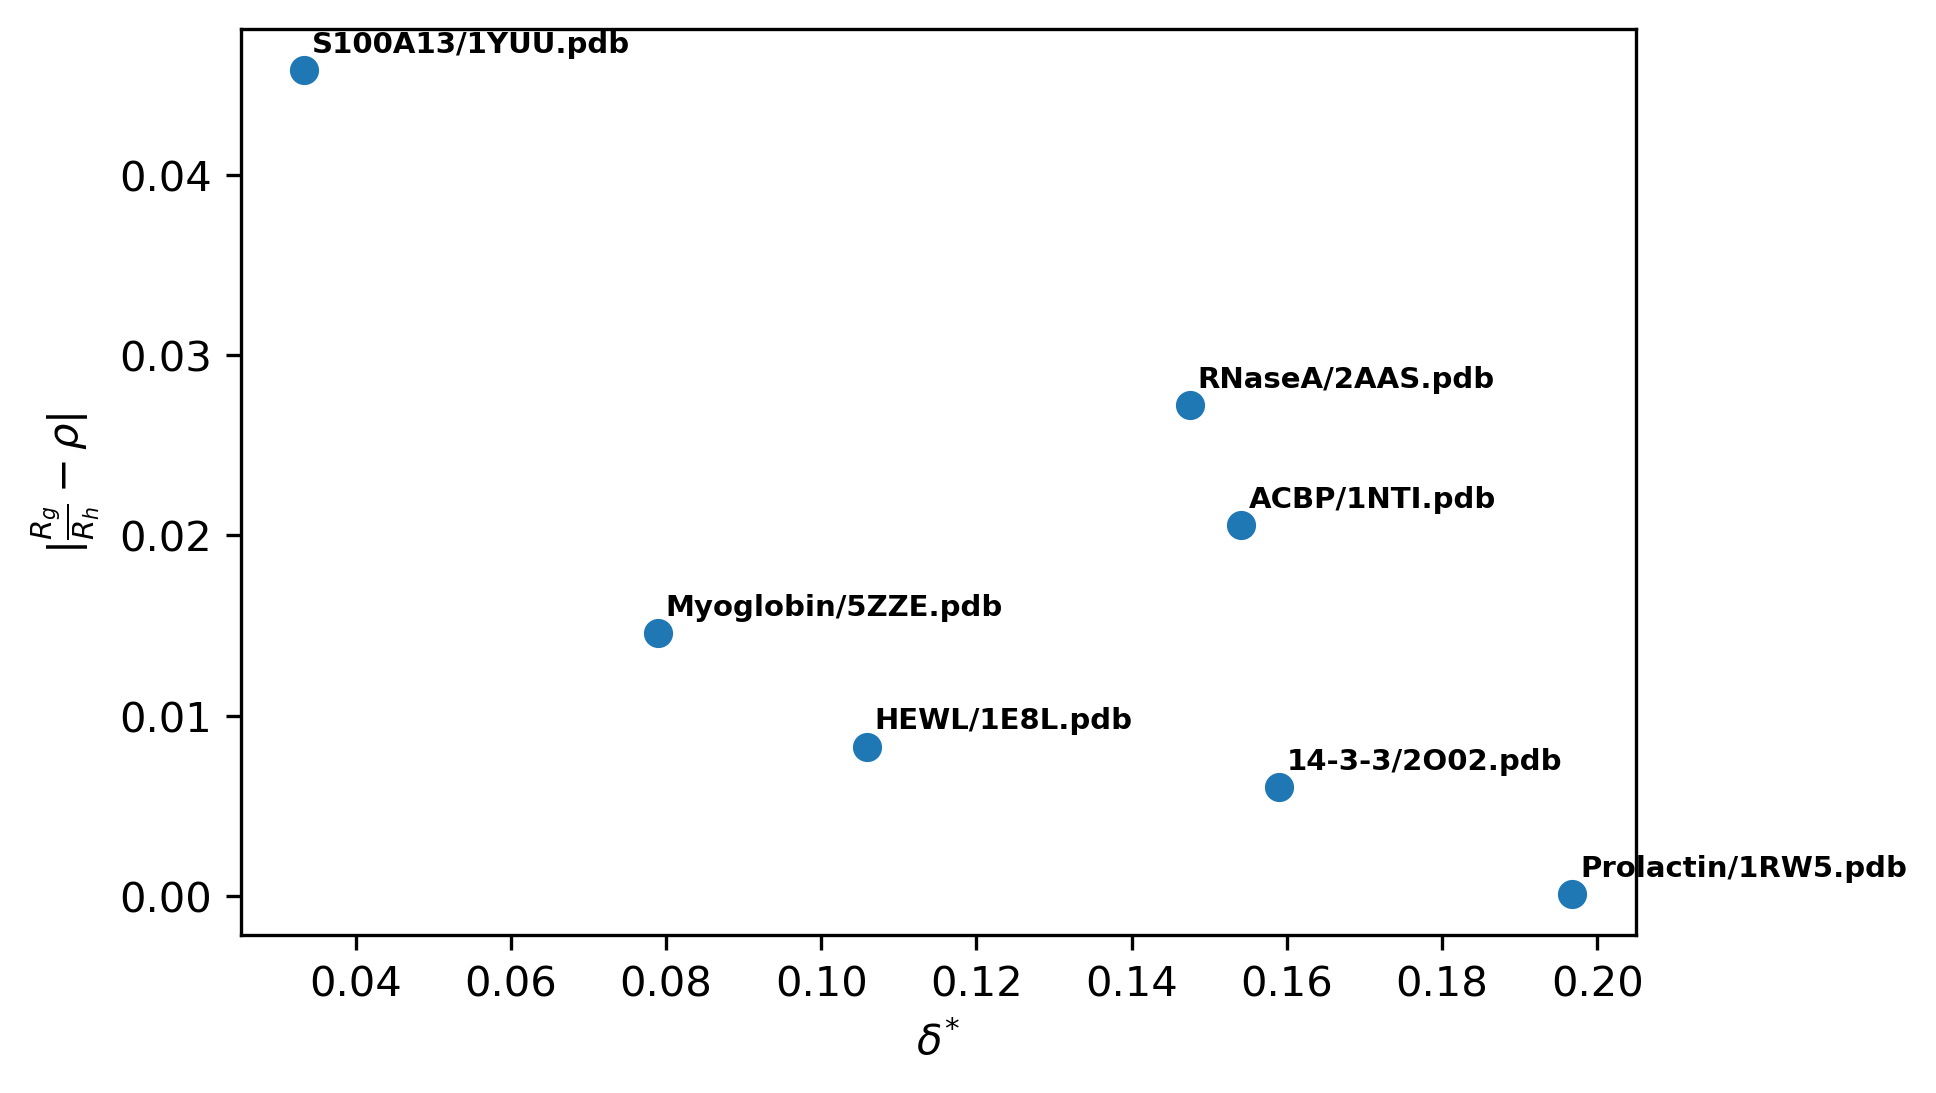

In [69]:
plt.figure(dpi=300, facecolor='w')
plt.scatter(asph, dev )
plt.xlabel(r'$\delta^{*}$')
plt.ylabel(r'|$\frac{R_g}{R_h}-\rho$|')
for i, txt in enumerate(pdbs):
    plt.annotate(txt, (asph[i]+0.001, dev[i]+0.001), fontsize=7, fontweight='bold', color='k')
plt.savefig('FIGS/asphericity.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait', bbox_inches='tight')

### IDPs

In [25]:
import pandas as pd
import scipy.stats as scs
import matplotlib as mpl

def kde(a, w=None):
    if w is None:
        w = np.full(len(a), 1)
    min_ = np.min(a)
    max_ = np.max(a)
    x = np.linspace( min_, max_, num = 50 )
    d = scs.gaussian_kde( a, bw_method = "silverman", weights = w ).evaluate(x)
    u = 1./np.average(1./a, weights = w)
    return x,d,u

names_form = ['Hst5', 'RS', 'Sic1', r'ProT$\alpha$', 'NHE6cmdd', 'A1', r'$\alpha$Syn', 'ANAC046', 'GHR-ICD', 'Tau']
mpl.style.use('default')
prop_cycle = plt.rcParams['axes.prop_cycle']
c = prop_cycle.by_key()['color']

In [37]:
dset = pd.read_csv('IDPs/dataset.csv',index_col=0)
dset['Rh_err_rel'] = dset.Rh_corr*2.1/100
dset

,Rh_corr,Rh_err_corr,sequence,length,Rh_err_rel
name,,,,,
Hst5,1.36425,0.035176,DSHAKRHHGYKRKFHEKHHSHRGY,24,0.028649
RS,1.27330,0.024858,GAMGPSYGRSRSRSRSRSRSRSRS,24,0.026739
Sic1,2.30050,0.124485,MTPSTPPRSRGTRYLAQPSGNTSSSALMQGQKTPQKPSQNLVPVTP...,90,0.048311
ProTa,3.09230,0.101472,GPSDAAVDTSSEITTKDLKEKKEVVEEAENGRDAPANGNANEENGE...,111,0.064938
NHE6cmdd,2.85690,0.054702,GPPLTTTLPACCGPIARCLTSPQAYENQEQLKDDDSDLILNDGDIS...,116,0.059995
A1,2.45030,0.077369,GSMASASSSQRGRSGSGNFGGGRGGGFGGNDNFGRGGNFSGRGGFG...,137,0.051456
aSyn,2.98530,0.061625,MDVFMKGLSKAKEGVVAAAEKTKQGVAEAAGKTKEGVLYVGSKTKE...,140,0.062691
ANAC046,3.25280,0.058308,NAPSTTITTTKQLSRIDSLDNIDHLLDFSSLPPLIDPGFLGQPGPS...,167,0.068309
GHR-ICD,5.43560,0.098143,SKQQRIKMLILPPVPVPKIKGIDPDLLKEGKLEEVNTILAIHDSYK...,351,0.114148


In [30]:
Rh_Nyg = {}
Rh_Kirk = {}
Rh_HR = {}
for p in dset.index:
    tmp = np.loadtxt('IDPs/{}_rh_fwmod.dat'.format(p))
    Rh_Nyg[p] = kde( tmp[...,0], tmp[...,-1] )
    Rh_Kirk[p] = kde( tmp[...,1], tmp[...,-1] )
    Rh_HR[p] = kde( tmp[...,2], tmp[...,-1] )

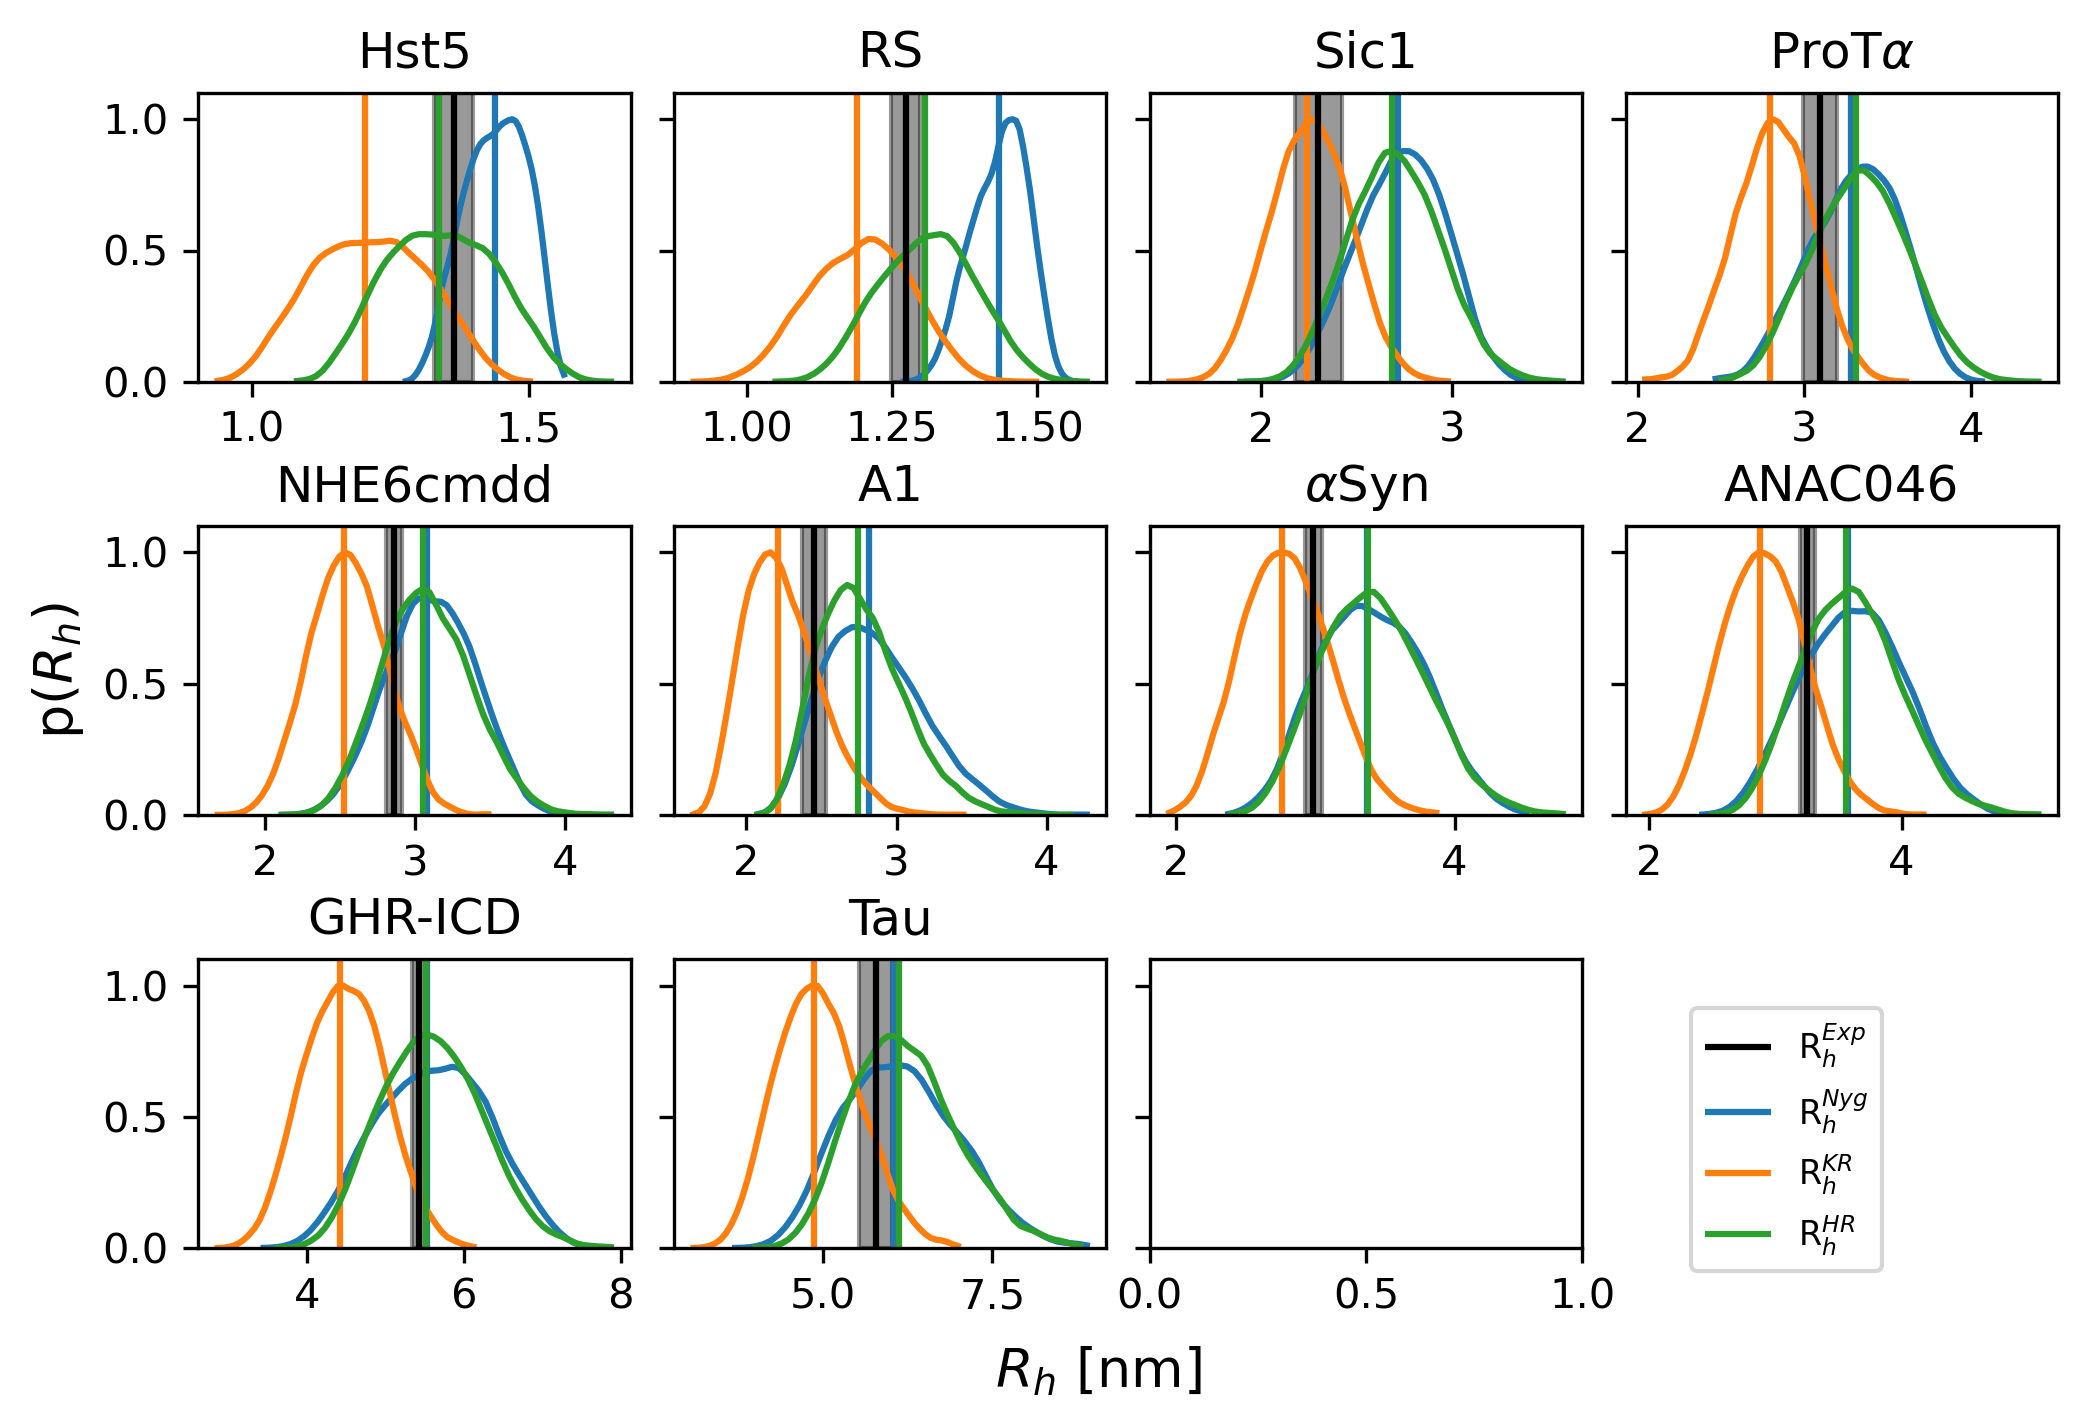

In [31]:
fig, axs = plt.subplots(3, 4, figsize=(8,5), facecolor='w', dpi=300, sharey=True)
for i,(p,ax) in enumerate(zip(dset.index, axs.flatten())):
    scale = np.max( [Rh_Nyg[p][1].max(), Rh_Kirk[p][1].max(), Rh_HR[p][1].max()] )
    
    ax.plot(Rh_Nyg[p][0], Rh_Nyg[p][1]/scale, label=r'Nygaard ($R_g$)',color=c[0])
    l1 = ax.vlines(Rh_Nyg[p][2],Rh_Nyg[p][1].min()-1,Rh_Nyg[p][1].max()+10,color=c[0])
    
    ax.plot(Rh_Kirk[p][0], Rh_Kirk[p][1]/scale, label='Kirkwood',color=c[1])
    l2 = ax.vlines(Rh_Kirk[p][2],Rh_Kirk[p][1].min()-1,Rh_Kirk[p][1].max()+10,color=c[1])
    
    ax.plot(Rh_HR[p][0], Rh_HR[p][1]/scale, label='HullRad',color=c[2])
    l3 = ax.vlines(Rh_HR[p][2],Rh_HR[p][1].min()-1,Rh_HR[p][1].max()+10,color=c[2])
    
    l0 = ax.vlines(dset.Rh_corr[p],Rh_Nyg[p][1].min()-1,Rh_Nyg[p][1].max()+10,label='Exp',color='k')
    #ax.set_ylim(0,np.max( [Rh_Nyg[p][1].max(), Rh_Kirk[p][1].max(), Rh_HR[p][1].max()] )+0.2)
    ax.set_ylim(0,1.1)
    ax.fill_between((dset.Rh_corr[p]-dset.Rh_err_corr[p],dset.Rh_corr[p]+dset.Rh_err_corr[p]),0,10,color='k',alpha=0.4)
    ax.set_title(names_form[i])

    
axs[-1,-1].axis('off')
axs.flatten()[4].set_ylabel(r'p($R_h$)', fontsize=13)
fig.supxlabel(r'$R_h$ [nm]', fontsize=13)

plt.subplots_adjust(wspace=0.1, 
                    hspace=0.5)

plt.figlegend( (l0,l1,l2,l3), (r'R$_h^{Exp}$' ,r'R$_h^{Nyg}$', r'R$_h^{KR}$', r'R$_h^{HR}$'), fontsize=8, loc=(0.81,0.11) )
#plt.savefig('rh_fwdmod_m1.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait', bbox_inches='tight')
plt.show()

In [38]:
chi2 = ([v[2] for x,v in Rh_Nyg.items()] - dset.Rh_corr.values)**2 / (dset.Rh_err_rel.values)**2
print ('Nygaard', chi2.sum())

chi2 = ([v[2] for x,v in Rh_Kirk.items()] - dset.Rh_corr.values)**2 / (dset.Rh_err_rel.values)**2
print ('Kirkwood', chi2.sum())

chi2 = ([v[2] for x,v in Rh_HR.items()] - dset.Rh_corr.values)**2 / (dset.Rh_err_rel.values)**2
print ('HullRad', chi2.sum())

Nygaard 255.2499126983364
Kirkwood 293.02157614582984
HullRad 188.44419994123055


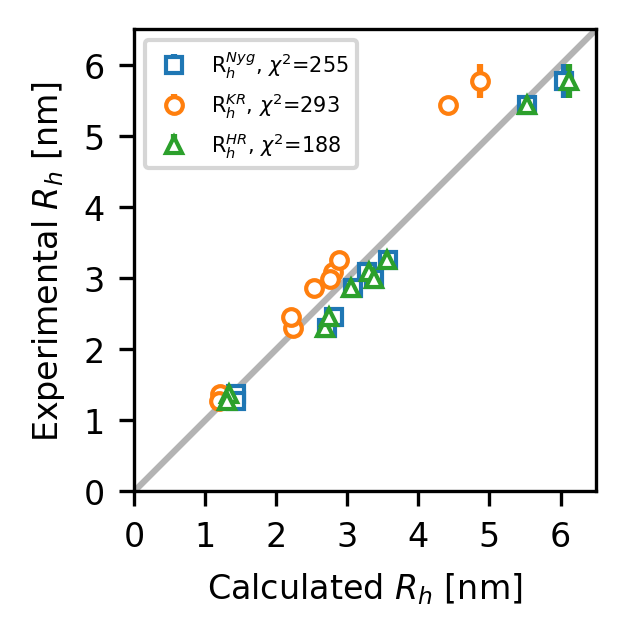

In [39]:
mpl.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(figsize=(2,2), dpi=300)

ax.set_box_aspect(1)
ax.plot([0,100], [0,100], c='0.7')
ax.errorbar([v[2] for x,v in Rh_Nyg.items()], dset.Rh_corr, dset.Rh_err_corr, fmt='s', mfc='w', label=r'R$_h^{Nyg}$, $\chi^2$=255' ,ms=4,alpha=1)
ax.errorbar([v[2] for x,v in Rh_Kirk.items()], dset.Rh_corr, dset.Rh_err_corr, fmt='o', mfc='w', label=r'R$_h^{KR}$, $\chi^2$=293' ,ms=4,alpha=1)
ax.errorbar([v[2] for x,v in Rh_HR.items()], dset.Rh_corr, dset.Rh_err_corr, fmt='^', mfc='w', label=r'R$_h^{HR}$, $\chi^2$=188' ,ms=4,alpha=1)
ax.set_xlabel(r'Calculated $R_h$ [nm]')
ax.set_ylabel(r'Experimental $R_h$ [nm]')
ax.set_ylim(0,6.5)
ax.set_xlim(0,6.5)
plt.legend(fontsize=5)
ax.set_xticks(np.arange(7),np.arange(0,7))
ax.set_yticks(np.arange(7),np.arange(0,7))

#plt.savefig('rh_fwmod.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait', bbox_inches='tight')
plt.show()

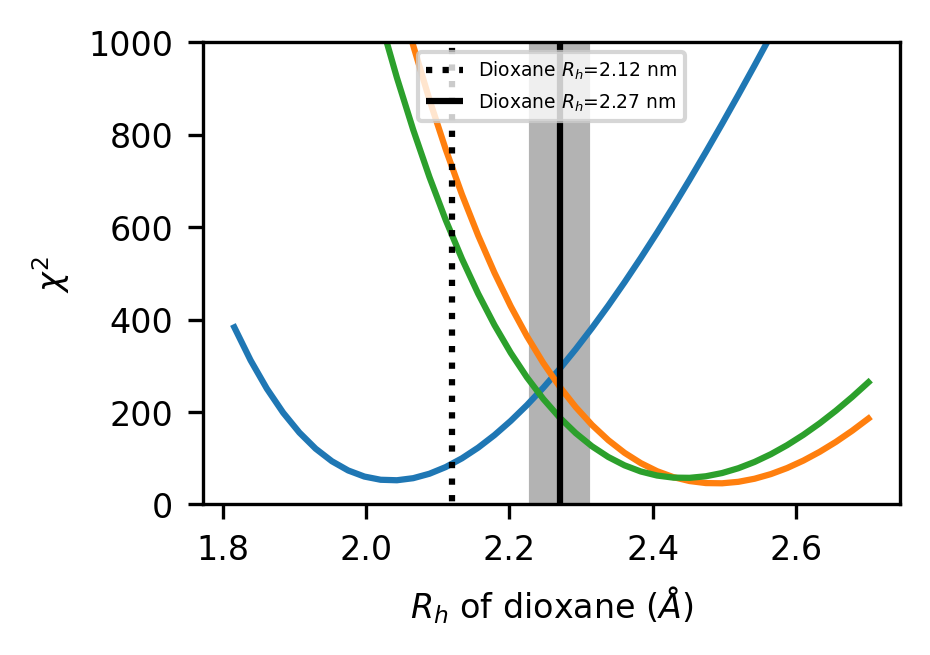

In [41]:
scale = np.arange(0.8,1.2,0.01)
kirk_chi2 = []
nyg_chi2 = []
hr_chi2 = []
for f in scale:
    chi2 = ([v[2] for x,v in Rh_Kirk.items()] - dset.Rh_corr.values*f)**2 / (dset.Rh_err_rel.values*f)**2
    kirk_chi2.append(chi2.sum())
    
    chi2 = ([v[2] for x,v in Rh_Nyg.items()] - dset.Rh_corr.values*f)**2 / (dset.Rh_err_rel.values*f)**2
    nyg_chi2.append(chi2.sum())
    
    chi2 = ([v[2] for x,v in Rh_HR.items()] - dset.Rh_corr.values*f)**2 / (dset.Rh_err_rel.values*f)**2
    hr_chi2.append(chi2.sum())
    
mpl.rcParams.update({'font.size': 8})
fig, ax = plt.subplots(figsize=(3,2), dpi=300)

plt.plot(scale*2.27, kirk_chi2)#,label='Kirkwood-Riseman eq.')
plt.plot(scale*2.27, nyg_chi2)#,label='Nygaard eq.')
plt.plot(scale*2.27, hr_chi2)#,label='HullRadSAS')

plt.vlines(2.12,-100,2000,color='k',ls='dotted', label=r'Dioxane $R_h$=2.12 nm')
plt.fill_between((2.27-0.04,2.27+0.04),0,1000,color='0.7')
plt.vlines(2.27,-100,2000,color='k', label=r'Dioxane $R_h$=2.27 nm')

plt.xlabel(r'$R_h$ of dioxane ($\AA$)')
plt.ylabel(r'$\chi^2$')
plt.ylim(0,1000)

plt.legend(fontsize=4.5)

#plt.savefig('scale_rh_diox.pdf', dpi=300, facecolor='w', edgecolor='w', orientation='portrait', bbox_inches='tight')